# 导入库

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import os
import sys
import time
from tensorflow import keras

print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__ + "的版本为：" + module.__version__)

sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib的版本为：3.1.1
numpy的版本为：1.16.5
pandas的版本为：0.25.3
sklearn的版本为：0.21.3
tensorflow的版本为：2.0.0
tensorflow_core.keras的版本为：2.2.4-tf


# 读入数据

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

# 查看数据

In [3]:
# import pprint

# pprint.pprint(housing.data[0:5])
# pprint.pprint(housing.target[0:5])

In [4]:
(housing.data[0:5], housing.target[0:5])

(array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
          1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
          3.78800000e+01, -1.22230000e+02],
        [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
          9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
          3.78600000e+01, -1.22220000e+02],
        [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
          1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
          3.78500000e+01, -1.22240000e+02],
        [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
          1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
          3.78500000e+01, -1.22250000e+02],
        [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
          1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
          3.78500000e+01, -1.22250000e+02]]),
 array([4.526, 3.585, 3.521, 3.413, 3.422]))

# 数据拆分

In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state = 11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


# 数据归一化处理

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_vaild_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

# 搭建神经网络

In [7]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(60, activation = 'relu', input_shape = x_train.shape[1:]),
     tf.keras.layers.Dense(120, activation = 'relu'),
     tf.keras.layers.Dense(240, activation = 'relu'),
     tf.keras.layers.Dense(480, activation = 'relu'),
     tf.keras.layers.Dense(240, activation = 'relu'),
     tf.keras.layers.Dense(120, activation = 'relu'),
     tf.keras.layers.Dense(60, activation = 'relu'),
     tf.keras.layers.Dense(1)]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 120)               7320      
_________________________________________________________________
dense_2 (Dense)              (None, 240)               29040     
_________________________________________________________________
dense_3 (Dense)              (None, 480)               115680    
_________________________________________________________________
dense_4 (Dense)              (None, 240)               115440    
_________________________________________________________________
dense_5 (Dense)              (None, 120)               28920     
_________________________________________________________________
dense_6 (Dense)              (None, 60)                7

# 设置优化模型、损失函数、回调函数

In [8]:
model.compile(optimizer = 'adam', loss = 'mse')

callbacks = [keras.callbacks.EarlyStopping(patience = 5, min_delta = 1e-3)]

# 模型训练

In [9]:
history = model.fit(x_train_scaled, y_train, validation_data = (x_vaild_scaled, y_valid), epochs = 3000, callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/3000
11610/11610 [==============================] - 5s 406us/sample - loss: 0.5854 - val_loss: 0.3889
Epoch 2/3000
11610/11610 [==============================] - 3s 257us/sample - loss: 0.3734 - val_loss: 0.3744
Epoch 3/3000
11610/11610 [==============================] - 4s 302us/sample - loss: 0.3446 - val_loss: 0.3658
Epoch 4/3000
11610/11610 [==============================] - 3s 274us/sample - loss: 0.3265 - val_loss: 0.3200
Epoch 5/3000
11610/11610 [==============================] - 3s 251us/sample - loss: 0.3147 - val_loss: 0.3286
Epoch 6/3000
11610/11610 [==============================] - 3s 279us/sample - loss: 0.3029 - val_loss: 0.3566
Epoch 7/3000
11610/11610 [==============================] - 3s 269us/sample - loss: 0.2958 - val_loss: 0.3758
Epoch 8/3000
11610/11610 [==============================] - 4s 309us/sample - loss: 0.2983 - val_loss: 0.3595
Epoch 9/3000
11610/11610 [==============================] - 3s 293us/sa

# 可视化loss值

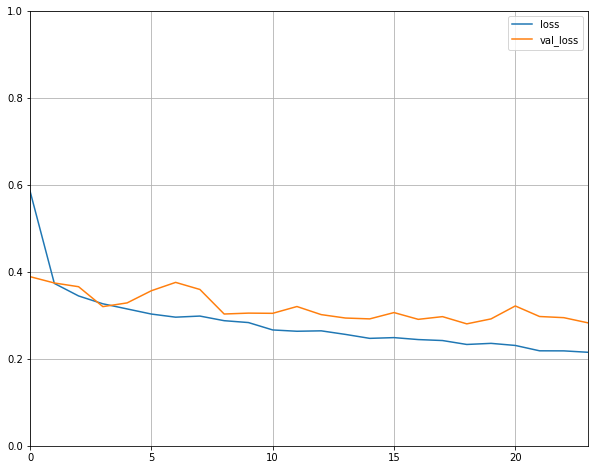

In [10]:
def plot_learning_curver(history):
    pd.DataFrame(history.history).plot(figsize = (10, 8))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)

plot_learning_curver(history)

# 测试集测试

In [11]:
model.evaluate(x_test_scaled, y_test, verbose=0)

0.2922197061453679